In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
Data = pd.read_csv ('/Users/soroushesnaashari/Bank_Personal_Loan_Modelling(1).csv', encoding='unicode_escape')

In [3]:
df = pd.DataFrame(Data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype(float)

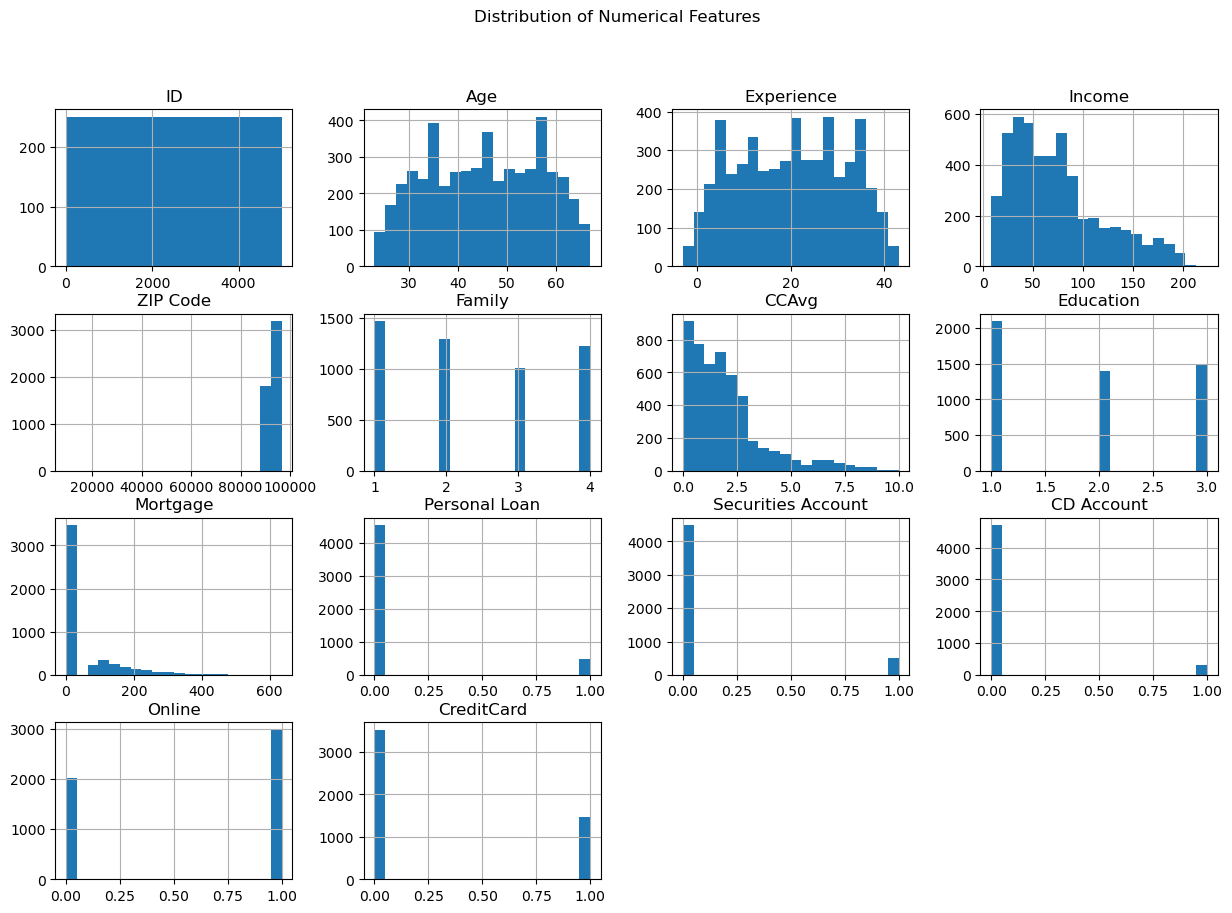

In [8]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Logic:
With all these bar plots you can figure a liitle bit out what this data set is really say

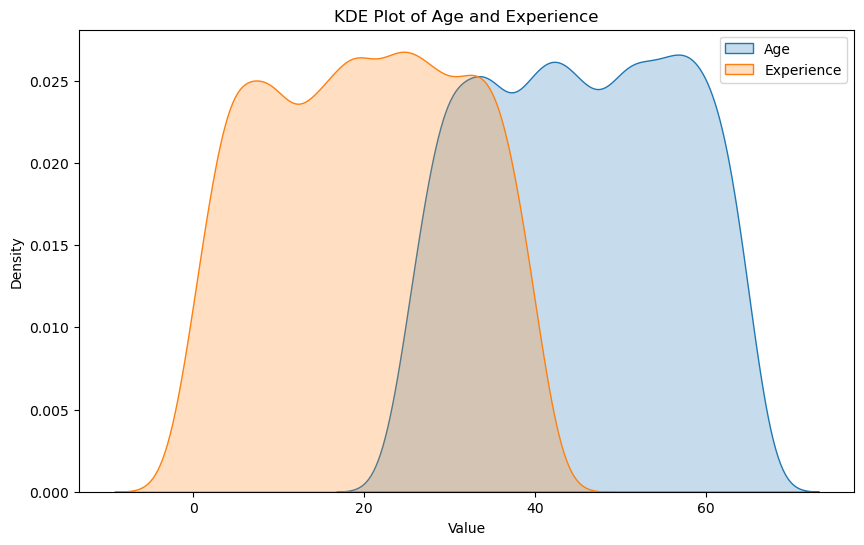

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'], label='Age', fill=True)
sns.kdeplot(df['Experience'], label='Experience', fill=True)
plt.title('KDE Plot of Age and Experience')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Logic:
This KDE plot is quit hard to understand but it is compare the density of "Age" and "Experience" which it says that  our data set is consist of people around 20 to 60 years old, while their work experince started from 0 to about 40 years 

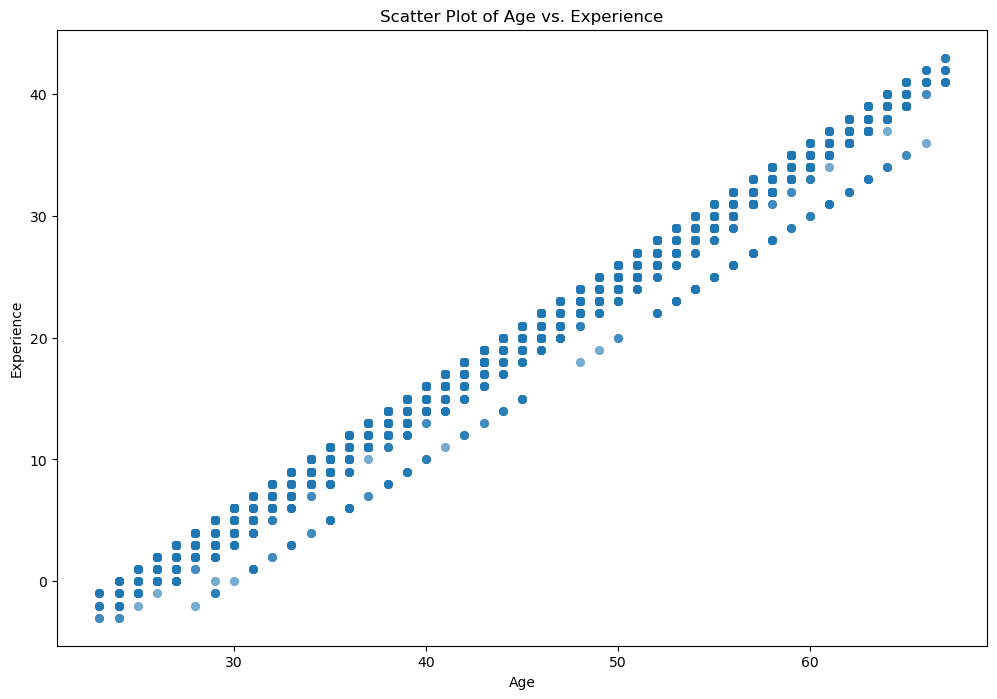

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Experience', data=df, alpha=0.6, edgecolor=None)

plt.xlabel('Age')
plt.ylabel('Experience')
plt.title('Scatter Plot of Age vs. Experience')
plt.show()

And here you can find out more about what is the real relationship between "Age" and "Experience". And also you can find a more visual one in the next plot which I use a Hexbin plot to show the amount of people's age and  experience

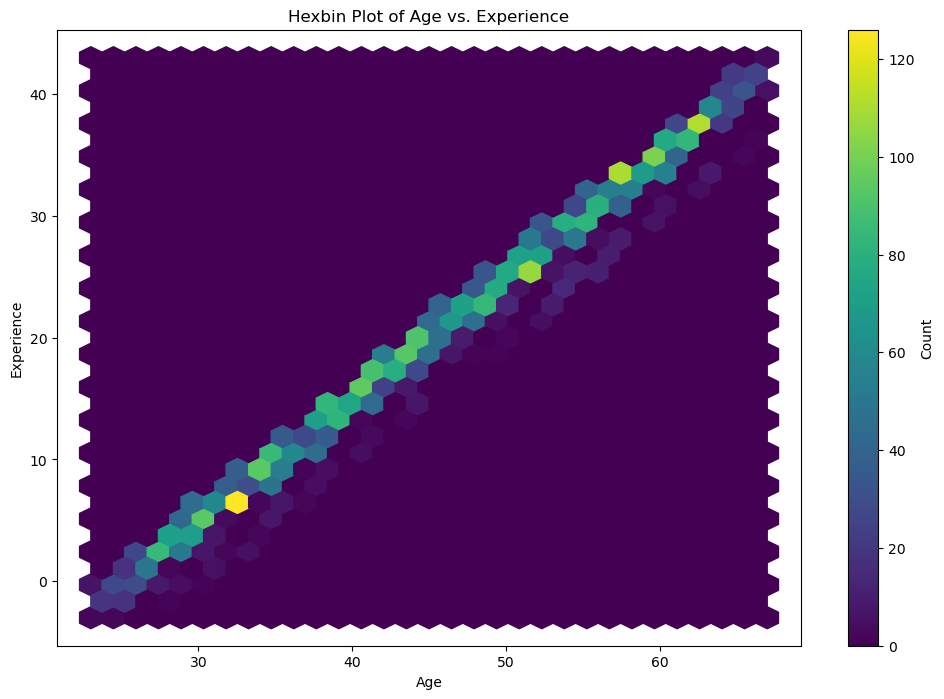

In [11]:
plt.figure(figsize=(12, 8))
plt.hexbin(df['Age'], df['Experience'], gridsize=30, cmap='viridis')

cb = plt.colorbar(label='Count')

plt.xlabel('Age')
plt.ylabel('Experience')
plt.title('Hexbin Plot of Age vs. Experience')
plt.show()

More visual :)

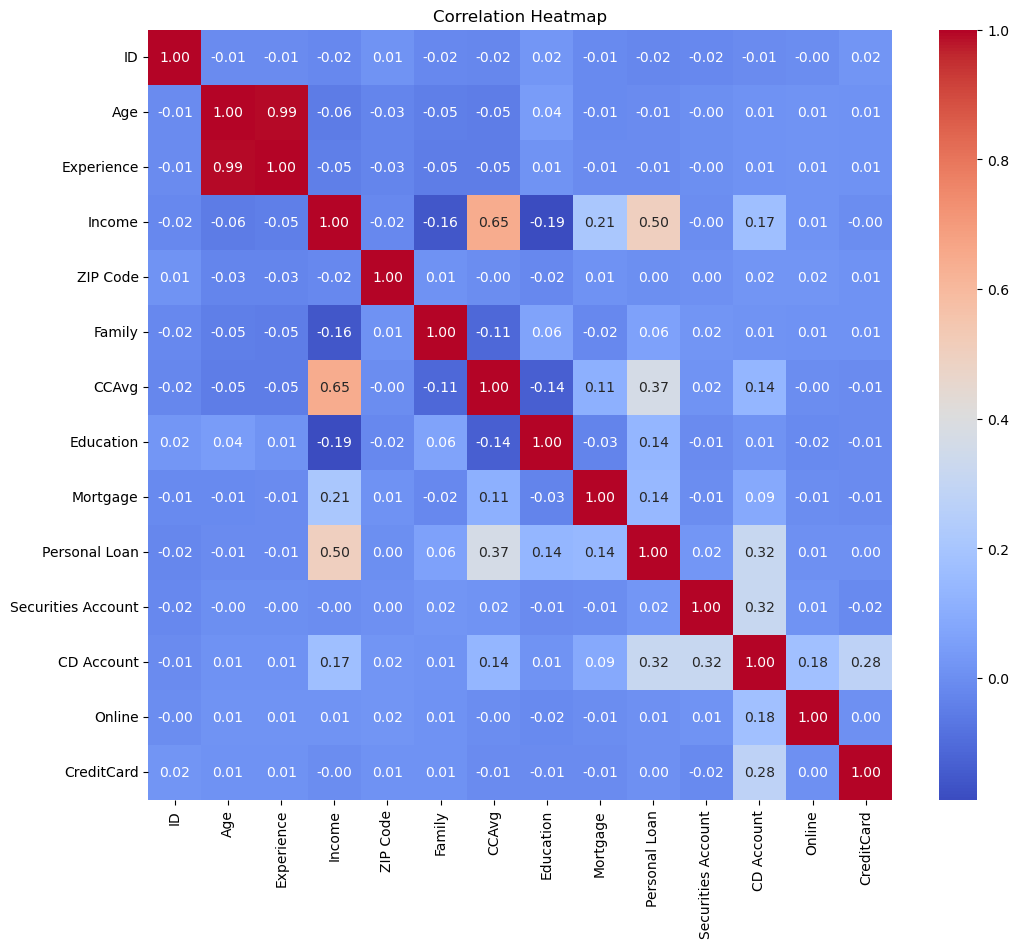

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Logic:
With this heat map plot you can see all the features and all the possible amount of them and in my opinion it will make the comparison easier between all features

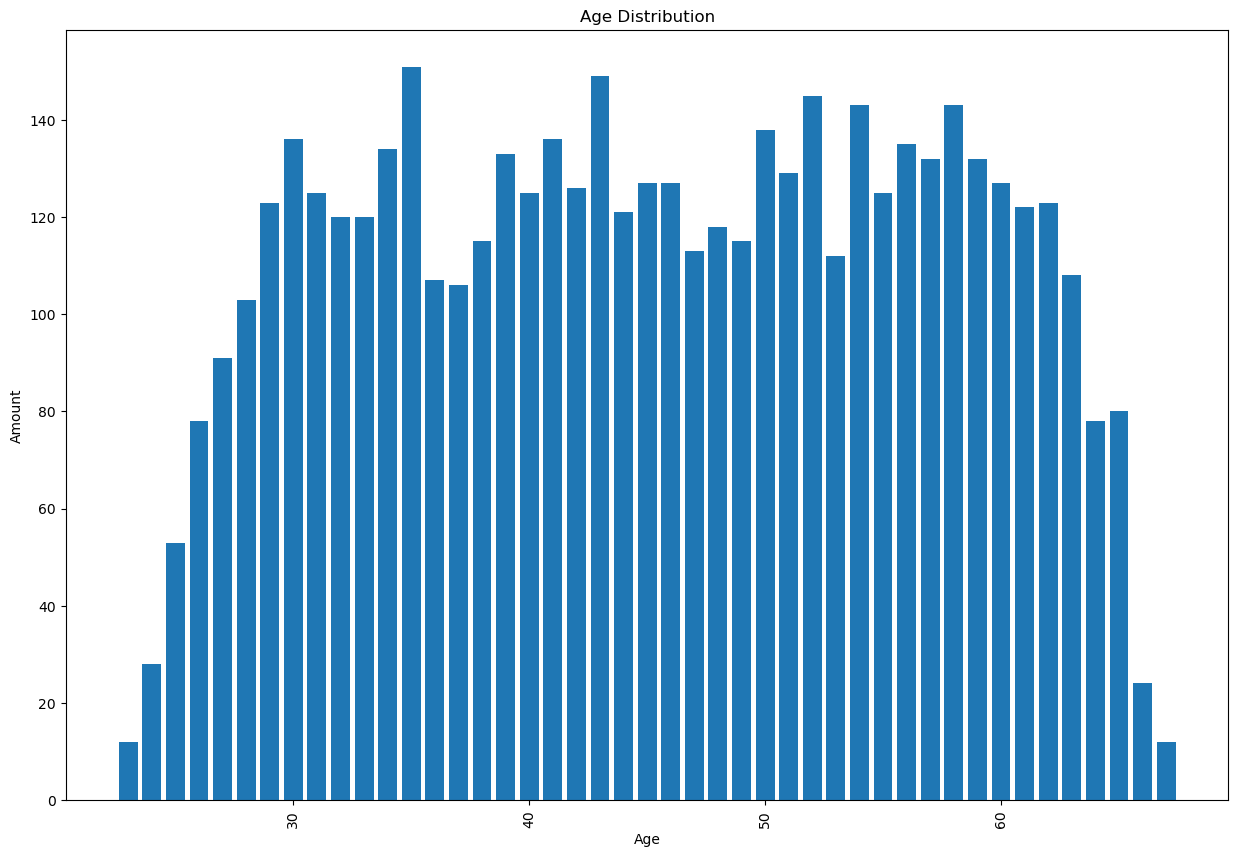

In [13]:
number_of_each_age = df['Age'].value_counts()
number_of_each_age = number_of_each_age.sort_values(ascending=False)

plt.figure(figsize=(15, 10))
plt.bar(number_of_each_age.index, number_of_each_age.values)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Age Distribution')
plt.show()

# Logic:
With this bar chart, I want to know about the ages of the people who received certain number of loan

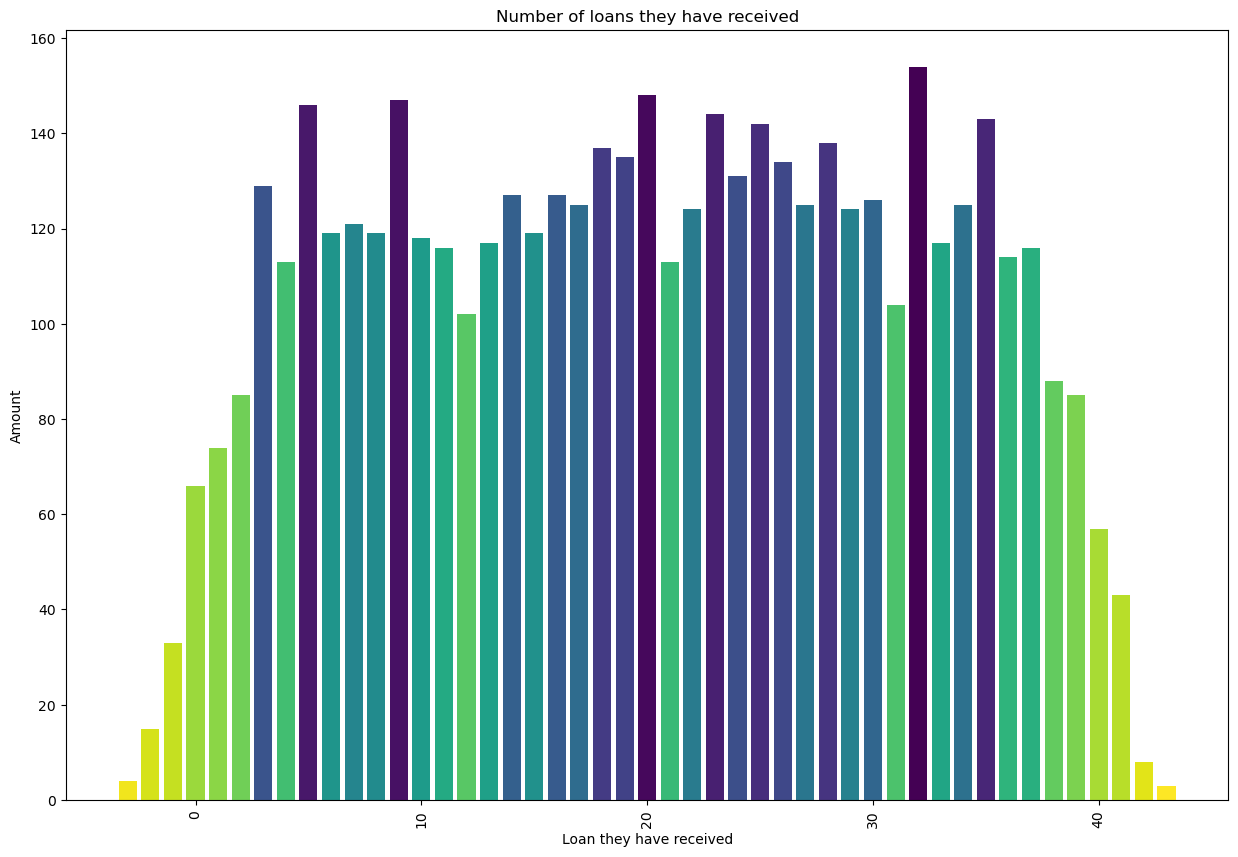

In [14]:
Number_of_loans_they_have_received = df['Experience'].value_counts()
Number_of_loans_they_have_received = Number_of_loans_they_have_received.sort_values(ascending=False)

colors = plt.cm.viridis(np.linspace(0, 1, len(Number_of_loans_they_have_received)))

plt.figure(figsize=(15, 10))
plt.bar(Number_of_loans_they_have_received.index, Number_of_loans_they_have_received.values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Loan they have received')
plt.ylabel('Amount')
plt.title('Number of loans they have received')
plt.show()

# Logic:
With this bar chart, I want to find out about the number of people who received a significant number of loan

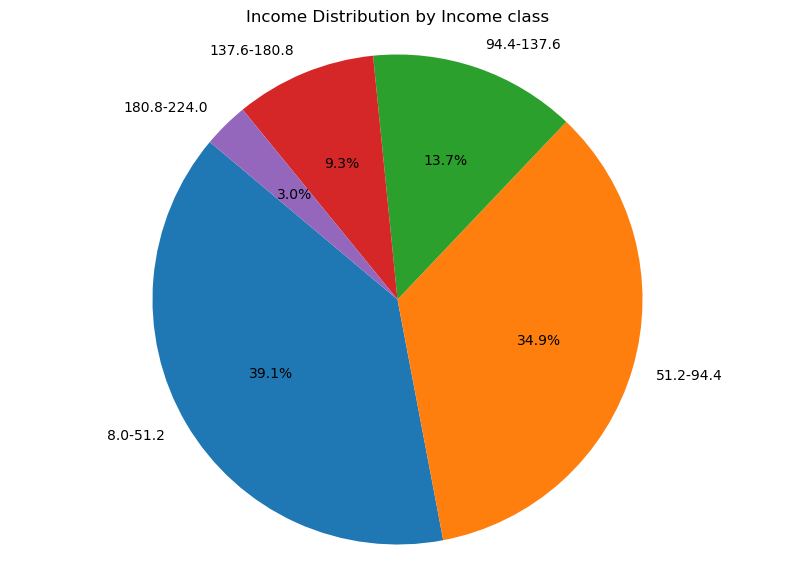

In [15]:
min_income = df['Income'].min()
max_income = df['Income'].max()
interval_size = (max_income - min_income) / 5
bins = [min_income + i * interval_size for i in range(6)]
labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)]
df['Income_Class'] = pd.cut(df['Income'], bins=bins, labels=labels, include_lowest=True)
income_class_counts = df['Income_Class'].value_counts().sort_index()

plt.figure(figsize=(10, 7))
plt.pie(income_class_counts, labels=income_class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution by Income class')
plt.axis('equal')
plt.show()

# Logic and explanation:
With this pie chart, I want to find out which group of income have the most number of people in it and with the combination of this chart and the next one we can find plenty of good points 

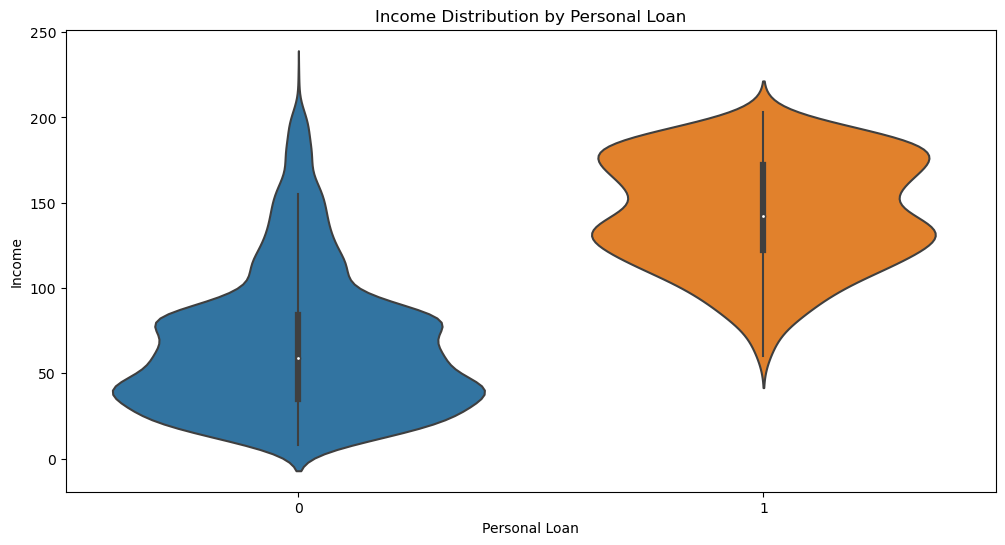

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Personal Loan', y='Income', data=df)
plt.title('Income Distribution by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Income')
plt.show()

# Logic:
With seeing the last plot you can find that the 30% of people are in high income's group and when you are putting the informations together with this plot you can find that those high incomes are getting most of the loans too. Make it a little bit clear, I want to say that those who have more income get more loans and its not good according to the previous plot they are only 39% of the society and most of the society can't handle loan return.

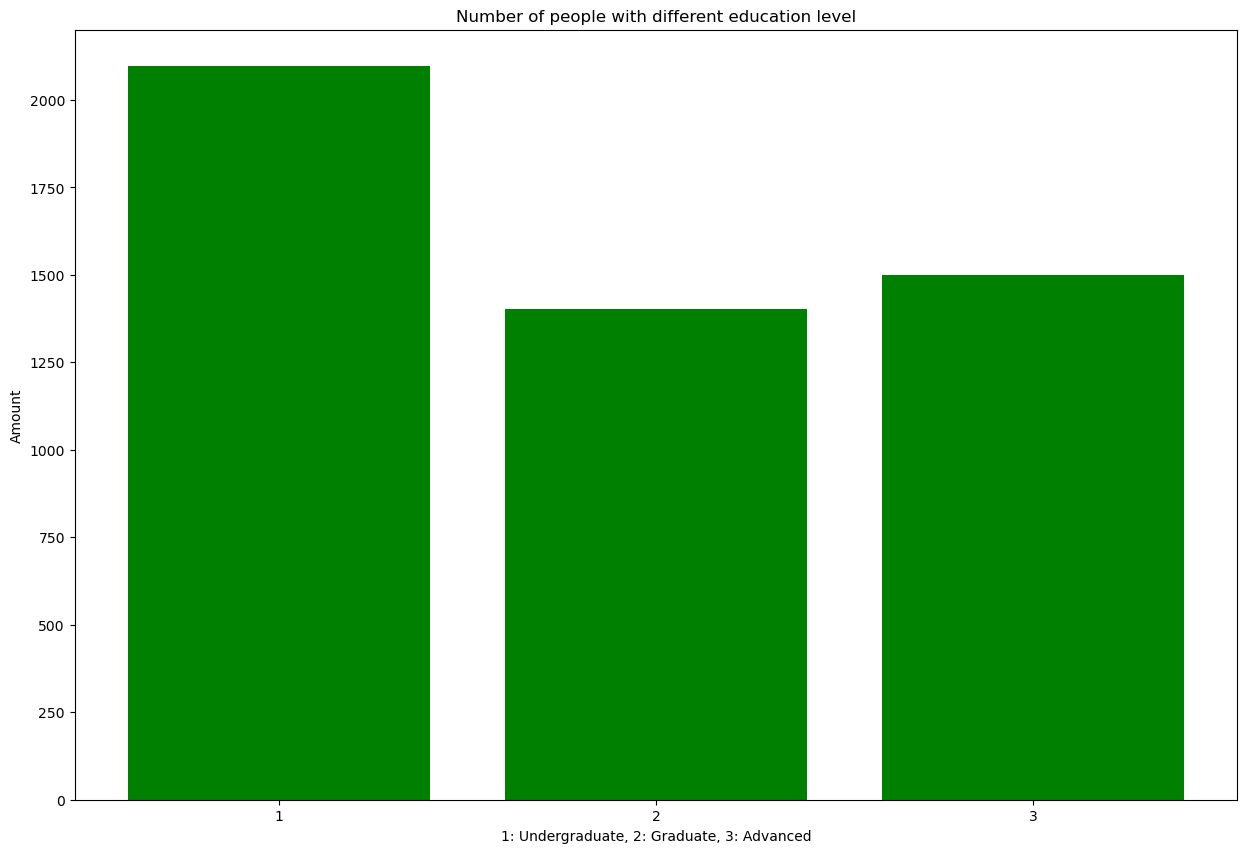

In [17]:
education_level = df['Education'].value_counts()
education_level = education_level.sort_values(ascending=False)

x_labels = education_level.index

plt.figure(figsize=(15, 10))
plt.bar(education_level.index, education_level.values, color='green')
plt.xticks(ticks=x_labels, labels=x_labels, rotation=0)
plt.xlabel('1: Undergraduate, 2: Graduate, 3: Advanced')
plt.ylabel('Amount')
plt.title('Number of people with different education level')
plt.show()

# Logic:
With this bar chart, I want to find out the number of people with different level of education

In [18]:
df['Mortgage'].min()

0

In [19]:
df['Mortgage'].max()

635

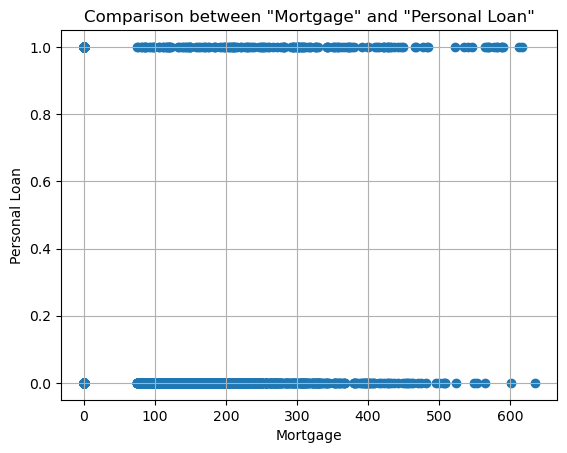

In [20]:
plt.scatter(df["Mortgage"], df["Personal Loan"])
plt.xlabel("Mortgage")
plt.ylabel("Personal Loan")
plt.title('Comparison between "Mortgage" and "Personal Loan"')
plt.grid()
plt.show()

With this scatter I want to found out the person who have bigger house or smaller house have different in getting loan rate which I found out not really much and all bunch of people get loan n omatter how valuable their house is

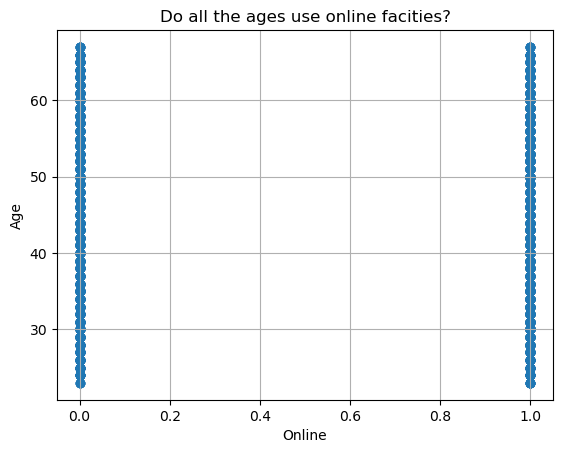

In [21]:
plt.scatter(df["Online"], df["Age"])
plt.xlabel("Online")
plt.ylabel("Age")
plt.title('Do all the ages use online facities?')
plt.grid()
plt.show()

The answer to the scatter's question is: "YES THEY DO"

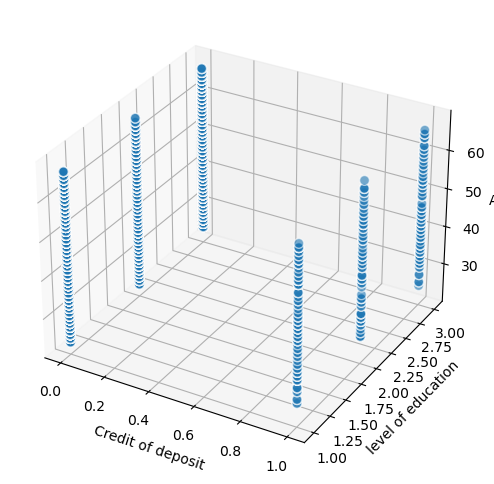

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['CD Account']
ys = df['Education']
zs = df['Age']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Credit of deposit')
ax.set_ylabel('level of education')
ax.set_zlabel('Age')

plt.show()

# Logic and explanation:
Here I want to know that do the deposit credit have a relationship to the people's age and education? and the answer I can get from the chart illustrate that it doesn't have significant difference. In all level of education and in all ages there are humans who have good credit and also there are people who have bad credit

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   int64   
 10  Securities Account  5000 non-null   int64   
 11  CD Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
 14  Income_Class        5000 non-null   category
dtypes: category(1), float64(1), int64(13)


In [24]:
df['Income_Class'].head()

0      8.0-51.2
1      8.0-51.2
2      8.0-51.2
3    94.4-137.6
4      8.0-51.2
Name: Income_Class, dtype: category
Categories (5, object): ['8.0-51.2' < '51.2-94.4' < '94.4-137.6' < '137.6-180.8' < '180.8-224.0']

In [25]:
df = df.drop(columns=['Income_Class'])

In [26]:
y = df['Personal Loan']
X = df.drop(columns=['Personal Loan', 'ID'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9506666666666667
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.84      0.65      0.73       157

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



# Naive Bayes

In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8913333333333333
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.48      0.60      0.54       157

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500



# K-Nearest Neighbors (KNN)

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9526666666666667
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.92      0.60      0.73       157

    accuracy                           0.95      1500
   macro avg       0.94      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500

